<a href="https://colab.research.google.com/github/tikoosaksham/data_analysis/blob/master/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
train = pd.read_csv ("titanicTrain.csv")

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train.shape

(891, 12)

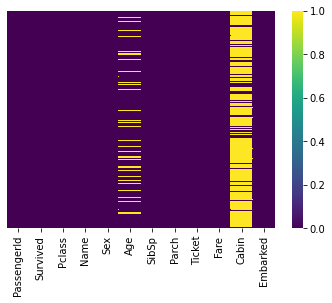

In [0]:
sns.heatmap (train.isnull() , yticklabels = False , cbar = True , cmap = "viridis")

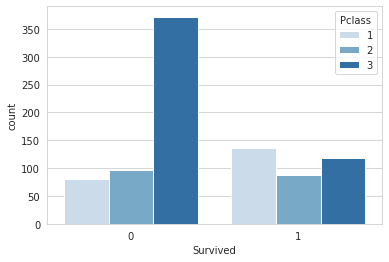

In [0]:
sns.set_style ("whitegrid")
sns.countplot ("Survived" , data = train , hue = "Pclass" , palette = "Blues")

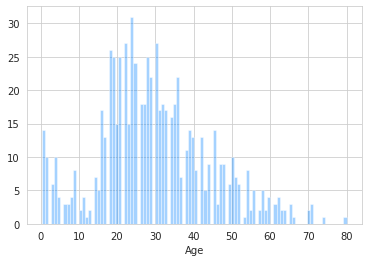

In [0]:
  sns.distplot (train["Age"].dropna() , kde = False , color = "dodgerblue" , bins = 100)

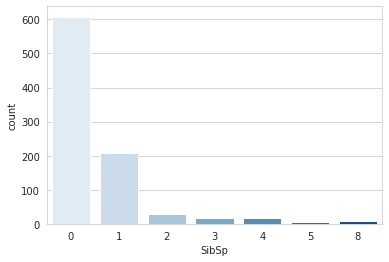

In [0]:
sns.countplot ("SibSp" , data = train , palette = "Blues")

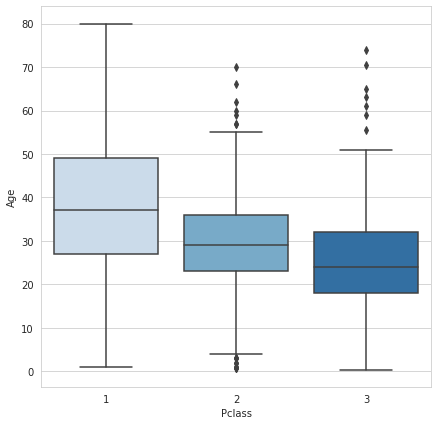

In [0]:
plt.figure (figsize = (7,7))
sns.boxplot ("Pclass" , "Age" , data = train , palette = "Blues")

In [0]:
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
            
        else:
            return 24
    else:
        return Age

In [0]:
def impute_embarked (col):
    
    if pd.isnull(col[0]):
        return "S"
    else:
        return col[0]

In [0]:
train["Embarked"] = train[["Embarked"]].apply(impute_embarked , axis = 1)

In [0]:
train["Age"] = train[["Age" , "Pclass"]].apply(impute_age , axis=1)

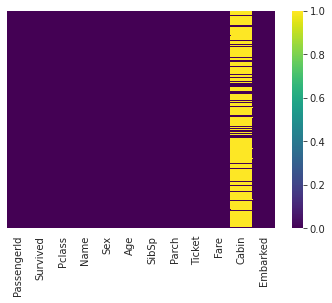

In [0]:
sns.heatmap (train.isnull() , cbar=True , yticklabels=False , cmap="viridis")

In [0]:
train.drop("Cabin" , axis=1 , inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train.dropna(inplace=True)

In [0]:
Sex = pd.get_dummies (train["Sex"] , drop_first=True)
Embark = pd.get_dummies (train["Embarked"] , drop_first=True)

In [0]:
train.drop (["Sex" , "Embarked" , "Name" , "Ticket"] , axis=1 , inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [0]:
train = pd.concat ([train , Sex , Embark] , axis=1)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
X_train , X_test , y_train , y_test = train_test_split (train.drop("Survived" , axis = 1) , train["Survived"] , test_size = 0.20 , random_state = 101)

In [0]:
logmodel = LogisticRegression()
logmodel.fit (X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
acc = confusion_matrix (y_test , predictions)
perc = accuracy_score(y_test , predictions) * 100
print (perc , "%")

79.88826815642457 %
